# G.SubtVision - Etapa 1
Tendo as tabelas com os resultados dos 10 folds de cada rede, mescla-se essas tabelas para assim obter o resultado do ensemble de cada rede. Esse ensemble é chamado de **Ensemble Single Arquiteture (SA)**

In [ ]:
# Imports principais e configuração
import os
import pandas as pd
from modules.constants import CLASSES, BASE_PATH, OUTPUT_DIR, AUC_ROC_SA_DIR, AUC_ROC_MA_DIR
from modules.io_utils import ensure_dir, save_csv
from modules.ensemble_sa import EnsembleSingleArchitecture
from modules.ensemble_ma import EnsembleMultiArchitecture

# Diretórios de saída
ensure_dir(OUTPUT_DIR)
ensure_dir(AUC_ROC_SA_DIR)
ensure_dir(AUC_ROC_MA_DIR)

print('CLASSES:', CLASSES)
print('BASE_PATH:', BASE_PATH)
print('OUTPUT_DIR:', OUTPUT_DIR)
print('AUC_ROC_SA_DIR:', AUC_ROC_SA_DIR)
print('AUC_ROC_MA_DIR:', AUC_ROC_MA_DIR)

CLASSES: ['cin', 'ebv', 'gs', 'msi']
BASE_PATH: inputs/summary_results/
OUTPUT_DIR: outputs
AUC_ROC_SA_DIR: outputs/auc_roc_sa_plots
AUC_ROC_MA_DIR: outputs/auc_roc_ma_plots


## Etapa 1 — Ensemble Single Arquitetura (SA)
Nesta etapa, para cada arquitetura, consolidamos os 10 folds em uma única tabela mesclada e avaliamos:
- Métricas de classificação em nível de TILE (Hard/Soft Voting).
- Agregação e métricas em nível de IMAGEM.
- Agregação e métricas em nível de PACIENTE.
- Curva ROC (Soft Voting) em nível de TILE, salvando a figura.

As implementações abaixo reproduzem fielmente a lógica dos notebooks originais, com funções encapsuladas no módulo `gsubtvision.ensemble_sa`.

In [2]:
# Configurações das arquiteturas (prefixos e nomes de modelos como usados nos arquivos de entrada)
sa = EnsembleSingleArchitecture(base_path=BASE_PATH, classes=CLASSES)

single_arch_configs = [
    {'network': 'MobileNetV2', 'prefix': 'm',  'model_names': ['0707-213643_MobileNetV2'], 'out_file': os.path.join(OUTPUT_DIR, 'merged_table_mob.csv'),  'roc_file': 'sa_tile_roc_m.png'},
    {'network': 'GoogleNet',   'prefix': 'g',  'model_names': ['0710-161214_GoogleNet'],   'out_file': os.path.join(OUTPUT_DIR, 'merged_table_gg.csv'),   'roc_file': 'sa_tile_roc_g.png'},
    {'network': 'ShuffleNetV2','prefix': 's',  'model_names': ['0711-213955_ShuffleNetV2'], 'out_file': os.path.join(OUTPUT_DIR, 'merged_table_sh.csv'),   'roc_file': 'sa_tile_roc_s.png'},
    {'network': 'EFF-NET (2º Treinamento)', 'prefix': 'e2', 'model_names': ['0903-102424_EFF-NET'], 'out_file': os.path.join(OUTPUT_DIR, 'merged_table_eff2.csv'), 'roc_file': 'sa_tile_roc_e2.png'},
]

print('Arquiteturas configuradas (SA):')
for cfg in single_arch_configs:
    print('-', cfg['network'], '=>', cfg['model_names'])

Arquiteturas configuradas (SA):
- MobileNetV2 => ['0707-213643_MobileNetV2']
- GoogleNet => ['0710-161214_GoogleNet']
- ShuffleNetV2 => ['0711-213955_ShuffleNetV2']
- EFF-NET (2º Treinamento) => ['0903-102424_EFF-NET']



=== [SA] Iniciando processamento: MobileNetV2 ===
Tabela mesclada salva! Com dimensões: (179952, 43) | arquivo: outputs\merged_table_mob.csv
===== Hard Voting 10 folds nível de TILE - MobileNetV2=====
              precision    recall  f1-score   support

         cin       0.64      0.74      0.69     89707
         ebv       0.55      0.35      0.43     25081
          gs       0.30      0.45      0.36     27191
         msi       0.64      0.32      0.43     37973

    accuracy                           0.55    179952
   macro avg       0.53      0.47      0.47    179952
weighted avg       0.57      0.55      0.55    179952


===== Soft Voting 10 folds nível de TILE - MobileNetV2 =====
              precision    recall  f1-score   support

         cin       0.62      0.78      0.69     89707
         ebv       0.61      0.30      0.40     25081
          gs       0.31      0.43      0.36     27191
         msi       0.65      0.31      0.42     37973

    accuracy                 

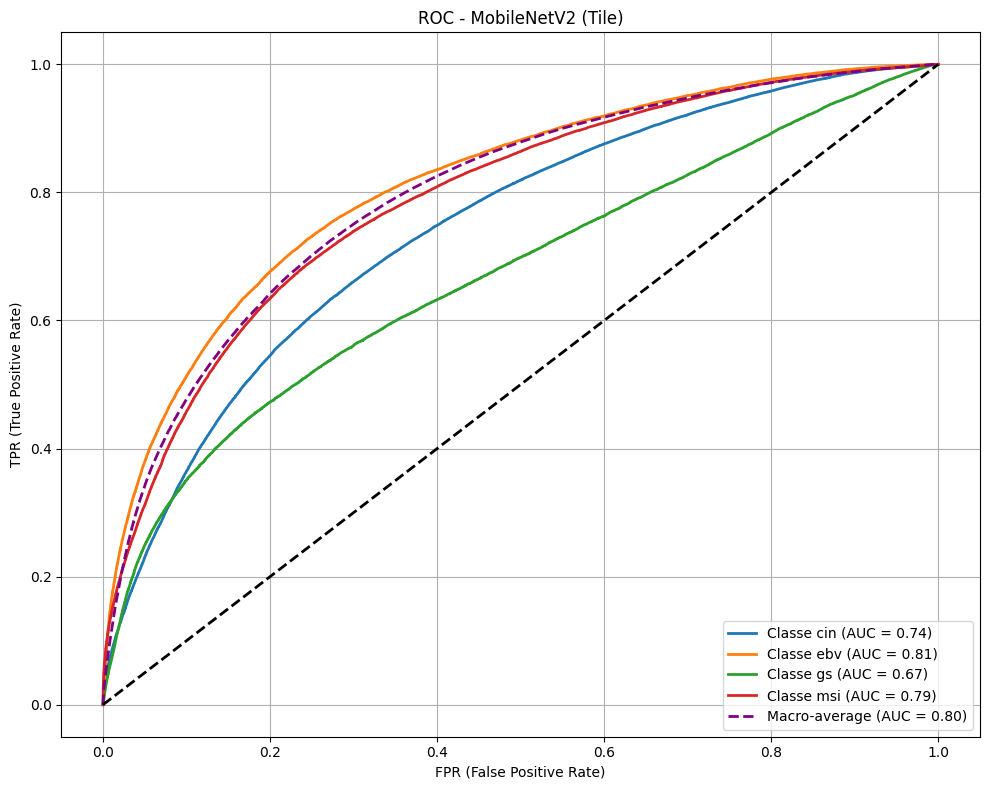

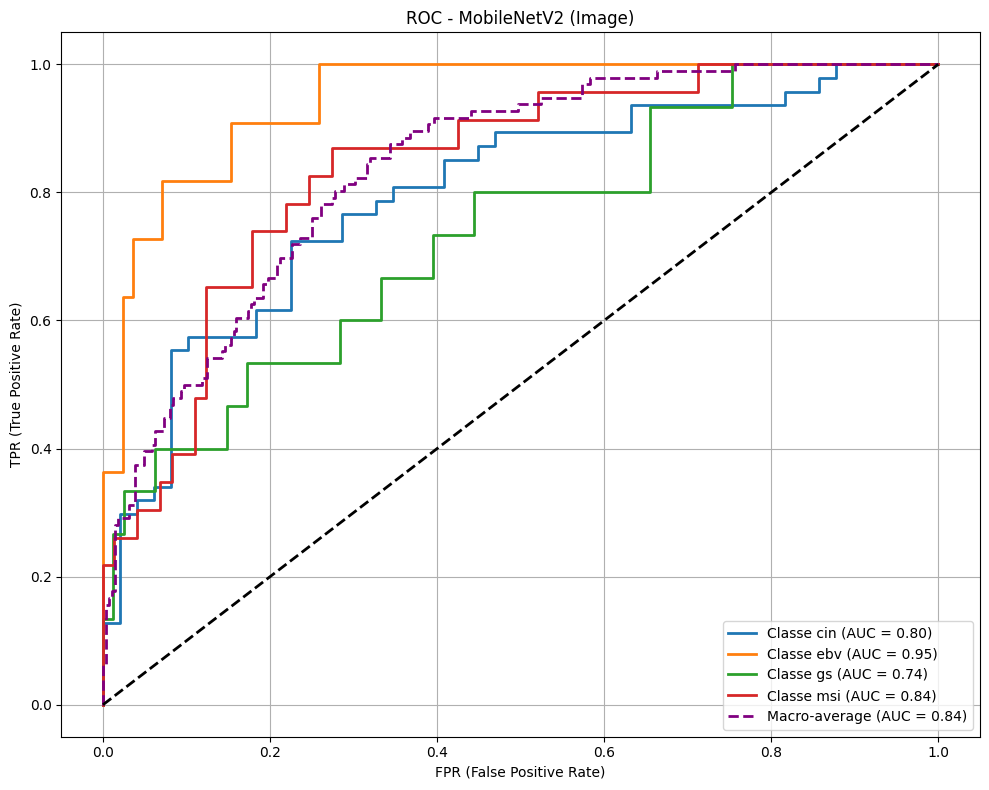

=== [SA] Finalizado: MobileNetV2 ===


=== [SA] Iniciando processamento: GoogleNet ===
Tabela mesclada salva! Com dimensões: (179952, 43) | arquivo: outputs\merged_table_gg.csv
===== Hard Voting 10 folds nível de TILE - GoogleNet=====
              precision    recall  f1-score   support

         cin       0.64      0.70      0.67     89707
         ebv       0.36      0.46      0.41     25081
          gs       0.36      0.44      0.39     27191
         msi       0.50      0.23      0.31     37973

    accuracy                           0.53    179952
   macro avg       0.47      0.46      0.45    179952
weighted avg       0.53      0.53      0.52    179952


===== Soft Voting 10 folds nível de TILE - GoogleNet =====
              precision    recall  f1-score   support

         cin       0.64      0.74      0.68     89707
         ebv       0.40      0.44      0.42     25081
          gs       0.36      0.43      0.40     27191
         msi       0.53      0.23      0.32     37973

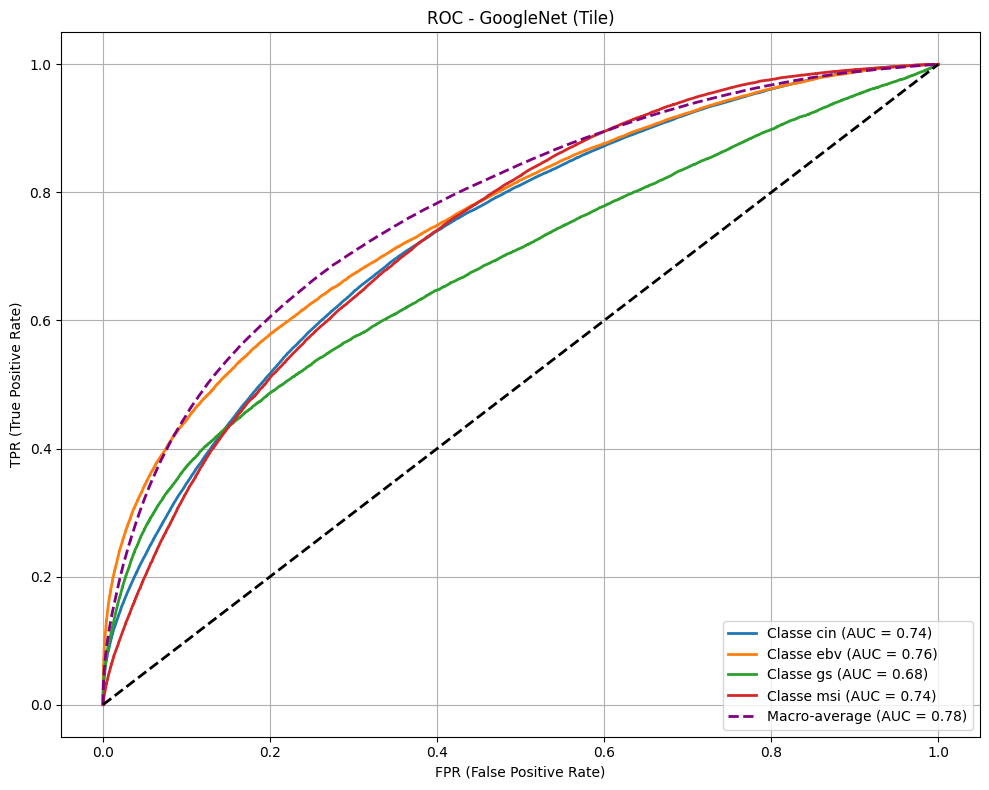

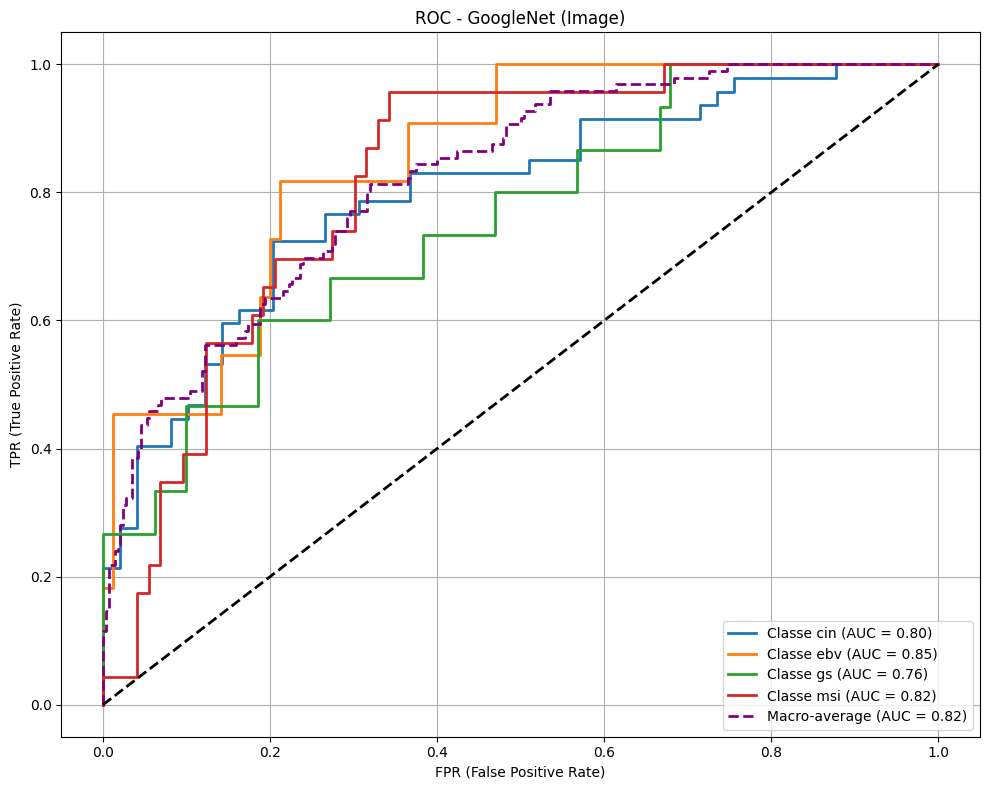

=== [SA] Finalizado: GoogleNet ===


=== [SA] Iniciando processamento: ShuffleNetV2 ===
Tabela mesclada salva! Com dimensões: (179952, 43) | arquivo: outputs\merged_table_sh.csv
===== Hard Voting 10 folds nível de TILE - ShuffleNetV2=====
              precision    recall  f1-score   support

         cin       0.62      0.79      0.69     89707
         ebv       0.58      0.42      0.49     25081
          gs       0.26      0.26      0.26     27191
         msi       0.59      0.32      0.42     37973

    accuracy                           0.56    179952
   macro avg       0.51      0.45      0.46    179952
weighted avg       0.55      0.56      0.54    179952


===== Soft Voting 10 folds nível de TILE - ShuffleNetV2 =====
              precision    recall  f1-score   support

         cin       0.61      0.81      0.70     89707
         ebv       0.62      0.40      0.48     25081
          gs       0.26      0.25      0.25     27191
         msi       0.62      0.32      0.42   

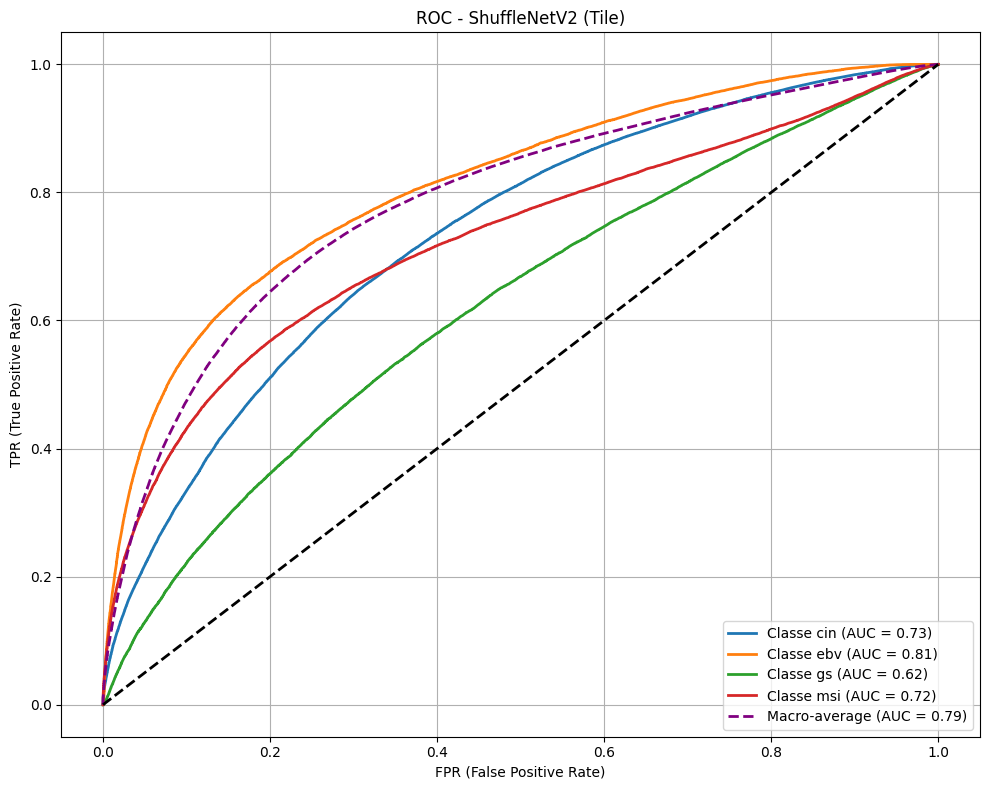

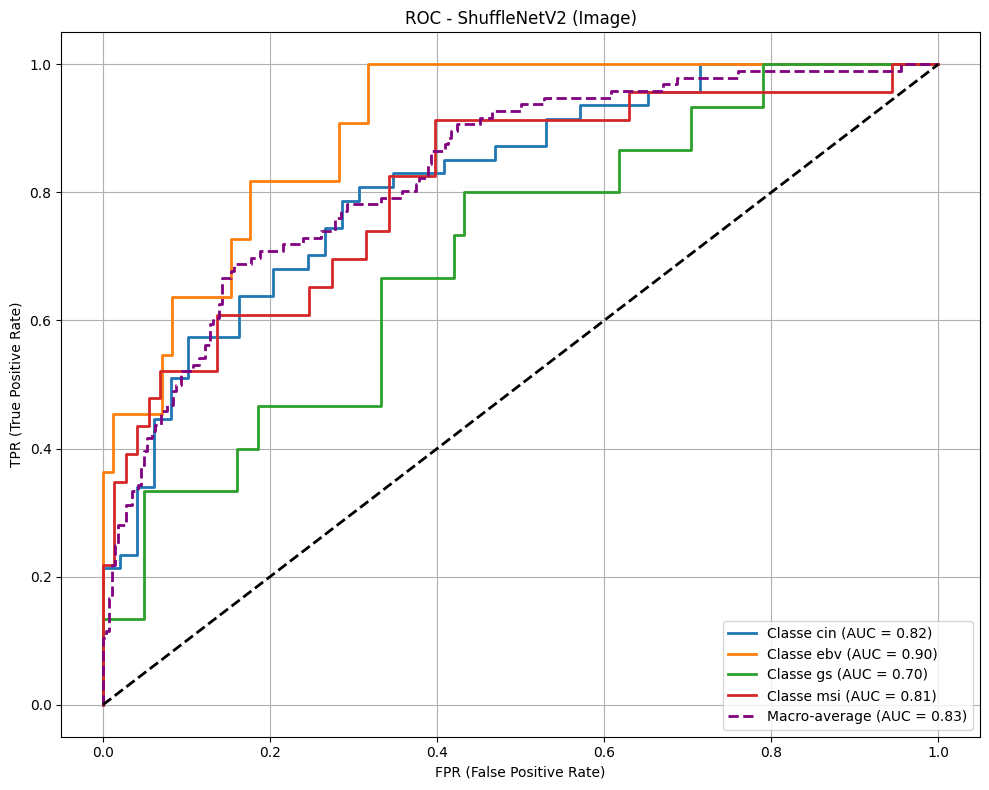

=== [SA] Finalizado: ShuffleNetV2 ===


=== [SA] Iniciando processamento: EFF-NET (2º Treinamento) ===
Tabela mesclada salva! Com dimensões: (179952, 43) | arquivo: outputs\merged_table_eff2.csv
===== Hard Voting 10 folds nível de TILE - EFF-NET (2º Treinamento)=====
              precision    recall  f1-score   support

         cin       0.61      0.81      0.70     89707
         ebv       0.51      0.41      0.45     25081
          gs       0.42      0.25      0.31     27191
         msi       0.48      0.31      0.38     37973

    accuracy                           0.57    179952
   macro avg       0.51      0.45      0.46    179952
weighted avg       0.54      0.57      0.54    179952


===== Soft Voting 10 folds nível de TILE - EFF-NET (2º Treinamento) =====
              precision    recall  f1-score   support

         cin       0.61      0.84      0.71     89707
         ebv       0.56      0.35      0.43     25081
          gs       0.42      0.24      0.31     27191
     

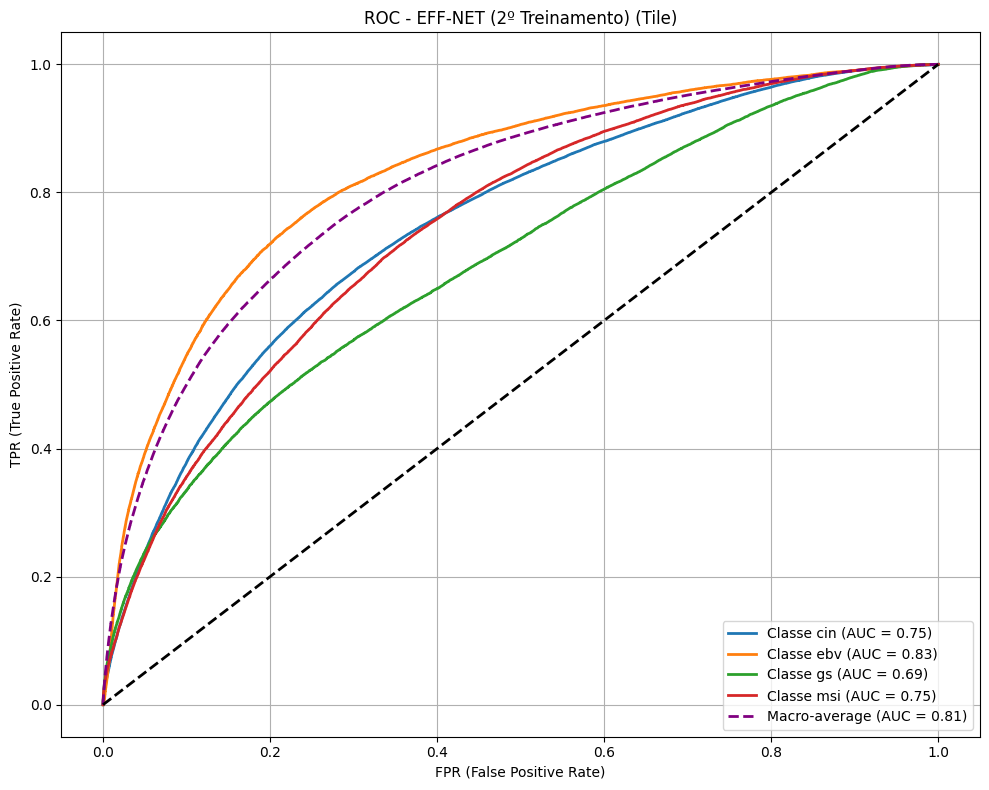

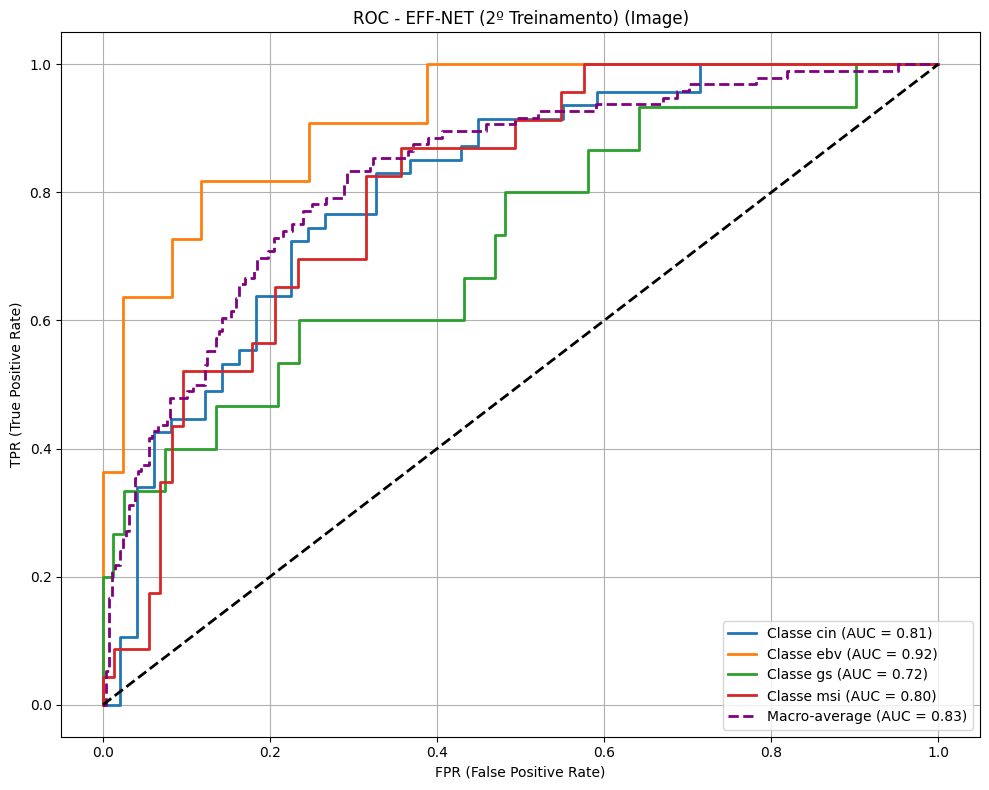

=== [SA] Finalizado: EFF-NET (2º Treinamento) ===



In [3]:
# Execução da Etapa 1 (SA) para cada arquitetura
for cfg in single_arch_configs:
    network = cfg['network']
    prefix = cfg['prefix']
    model_names = cfg['model_names']
    out_file = cfg['out_file']
    roc_file = cfg['roc_file']

    print(f'\n=== [SA] Iniciando processamento: {network} ===')

    # 1) Mescla dos 10 folds dessa arquitetura (gera tabela consolidada)
    merged_df = sa.generate_merged_table(folders=[prefix], model_names=model_names)
    save_csv(merged_df, out_file, index=False)
    print(f'Tabela mesclada salva! Com dimensões: {merged_df.shape} | arquivo: {out_file}')

    # 2) Métricas em nível de TILE (Hard/Soft Voting)
    merged_df = sa.hard_voting(merged_df, model_prefix=prefix, network=network, print_flag=True)
    merged_df = sa.soft_voting(merged_df, model_prefix=prefix, network=network, classes=CLASSES, print_flag=True)

    # 3) Agregação e métricas em nível de IMAGEM
    agg_img = sa.aggregate_to_image_level(merged_df, classes=CLASSES)
    sa.evaluate_ensembles_image(agg_img, network=network)

    # 4) Agregação e métricas em nível de PACIENTE
    agg_pat = sa.aggregate_to_patient_level(merged_df, classes=CLASSES)
    sa.evaluate_ensembles_patient(agg_pat, network=network)

    # 5) Curva ROC (Soft Voting) em nível de TILE
    sa.plot_sodt_roc_curve(
        df=merged_df,
        level='TILE',
        fig_name=f'ROC - {network} (Tile)',
        file_name=roc_file,
        classes=CLASSES,
        save_output_dir=AUC_ROC_SA_DIR
    )

    # 6) Curva ROC (Soft Voting) em nível de IMAGEM
    sa.plot_sodt_roc_curve(
        df=agg_img,
        level='IMAGE',
        fig_name=f'ROC - {network} (Image)',
        file_name=roc_file.replace('.png', '_img.png'),
        classes=CLASSES,
        save_output_dir=AUC_ROC_SA_DIR
    )
    print(f'=== [SA] Finalizado: {network} ===\n')

## Etapa 2 — Ensemble Multi-Arquitetura (MA)
Nesta etapa, unificamos as tabelas (30 folds no total) de três arquiteturas: MobileNetV2, ShuffleNetV2 e GoogleNet. Em seguida, avaliamos:
- Métricas de classificação em nível de TILE (Hard/Soft Voting).
- Curva ROC (Soft Voting) em nível de TILE, salvando a figura.
- Métricas de classificação em nível de IMAGEM (Hard/Soft Voting).
- Curva ROC (Soft Voting) em nível de IMAGEM, salvando a figura.

In [4]:
# Configuração e unificação das 3 arquiteturas (MA)
ma = EnsembleMultiArchitecture(base_path=BASE_PATH, classes=CLASSES)
ma_folders = ['m', 's', 'g']
ma_model_names = ['0707-213643_MobileNetV2', '0711-213955_ShuffleNetV2', '0710-161214_GoogleNet']
ma_out_file = os.path.join(OUTPUT_DIR, 'merged_table_mob_shu_gg.csv')

print('Arquiteturas configuradas (MA):', ma_model_names)
merged_ma_df = ma.merge_three_architectures(folders=ma_folders, model_names=ma_model_names)
save_csv(merged_ma_df, ma_out_file, index=False)
print(f'Tabela mesclada salva! Com dimensões: {merged_ma_df.shape} | arquivo: {ma_out_file}')

Arquiteturas configuradas (MA): ['0707-213643_MobileNetV2', '0711-213955_ShuffleNetV2', '0710-161214_GoogleNet']
Nomes das colunas da primeira tabela mesclada: 
 ['image_path', 'true_label', 'true_label_one_hot', 'predicted_label_m0', 'predicted_probability_m0', 'probability_vector_m0', 'probability_std_dev_m0']
Tabela mesclada salva! Com dimensões: (179952, 123) | arquivo: outputs\merged_table_mob_shu_gg.csv


In [5]:
# Métricas em nível de TILE (Hard/Soft Voting) para MA
merged_ma_df = ma.hard_voting(merged_ma_df, print_flag=True)
merged_ma_df = ma.soft_voting(merged_ma_df, print_flag=True)

===== HARD VOTING MÉTRICAS =====
              precision    recall  f1-score   support

         cin       0.63      0.79      0.70     89707
         ebv       0.58      0.41      0.48     25081
          gs       0.33      0.40      0.36     27191
         msi       0.64      0.28      0.39     37973

    accuracy                           0.57    179952
   macro avg       0.55      0.47      0.48    179952
weighted avg       0.58      0.57      0.55    179952


===== SOFT VOTING MÉTRICAS =====
              precision    recall  f1-score   support

         cin       0.62      0.80      0.70     89707
         ebv       0.62      0.39      0.48     25081
          gs       0.34      0.40      0.36     27191
         msi       0.65      0.28      0.39     37973

    accuracy                           0.57    179952
   macro avg       0.56      0.47      0.48    179952
weighted avg       0.59      0.57      0.56    179952



In [7]:
# Agregação e métricas em nível de IMAGEM
agg_image_df = ma.aggregate_to_image_level(merged_ma_df)
ma.evaluate_ensembles_image(agg_image_df)


===== Hard Voting 10 folds nível de IMAGEM - Multi-Arquitetura =====
              precision    recall  f1-score   support

         cin       0.54      0.91      0.68        47
         ebv       1.00      0.27      0.43        11
          gs       0.50      0.33      0.40        15
         msi       1.00      0.17      0.30        23

    accuracy                           0.57        96
   macro avg       0.76      0.42      0.45        96
weighted avg       0.70      0.57      0.52        96


===== Soft Voting 10 folds nível de IMAGEM - Multi-Arquitetura =====
              precision    recall  f1-score   support

         cin       0.54      0.94      0.69        47
         ebv       1.00      0.27      0.43        11
          gs       0.56      0.33      0.42        15
         msi       1.00      0.13      0.23        23

    accuracy                           0.57        96
   macro avg       0.77      0.42      0.44        96
weighted avg       0.71      0.57      0.51   

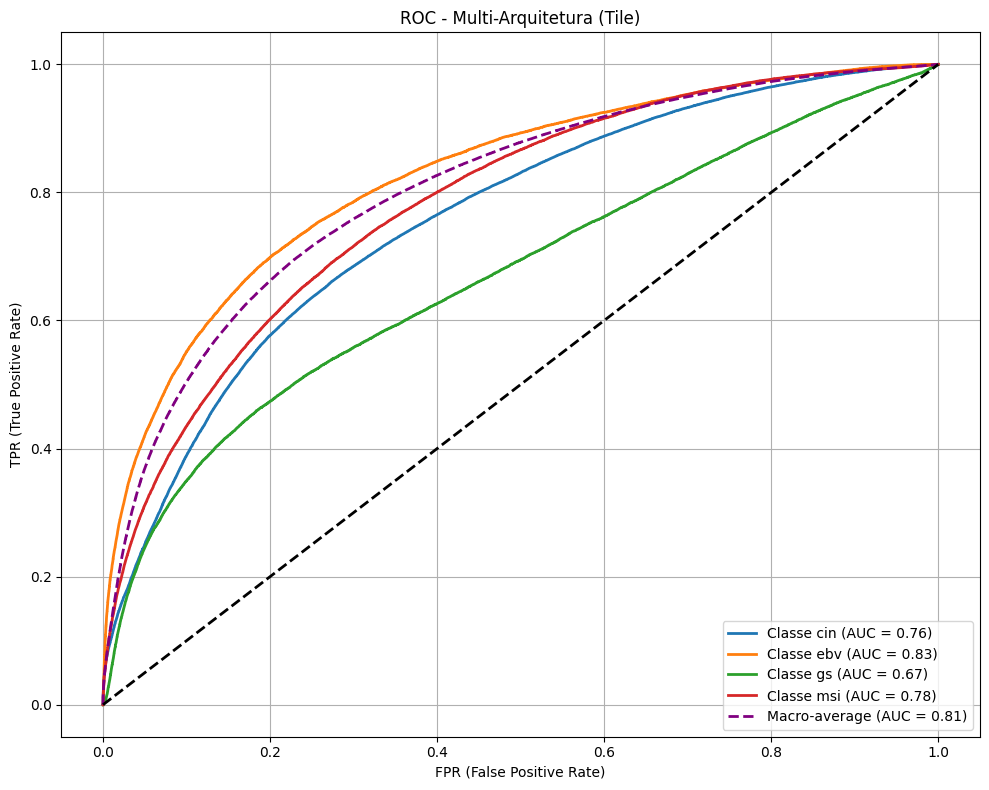

Figura ROC (MA) salva com sucesso.


In [8]:
# Curva ROC (Soft Voting) em nível de TILE para MA
ma.plot_sodt_roc_curve(
    df=merged_ma_df,
    level='TILE',
    fig_name='ROC - Multi-Arquitetura (Tile)',
    file_name='ma_tile_roc.png',
    save_output_dir=AUC_ROC_MA_DIR
)
print('Figura ROC (MA) salva com sucesso.')

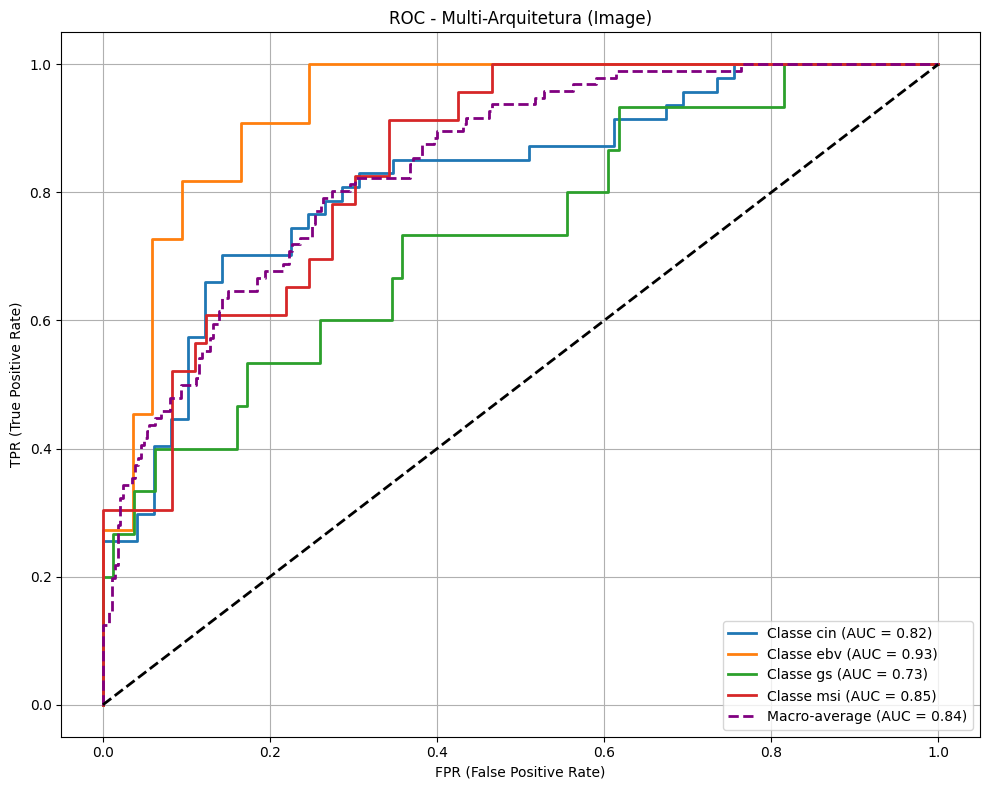

In [15]:
# Curva ROC em nível de IMAGEM
ma.plot_sodt_roc_curve(
    df=agg_image_df,
    level='IMAGE',
    fig_name=f'ROC - Multi-Arquitetura (Image)',
    file_name='ma_image_roc.png',
    save_output_dir=AUC_ROC_MA_DIR
)

In [11]:
# Agregação e métricas em nível de PACIENTE
agg_patient_df = ma.aggregate_to_patient_level(merged_ma_df)
ma.evaluate_ensembles_patient(agg_patient_df)   

===== Hard Voting 10 folds nível de PATIENT - Multi-Arquitetura =====
              precision    recall  f1-score   support

         cin       0.58      0.95      0.72        41
         ebv       1.00      0.30      0.46        10
          gs       0.62      0.38      0.48        13
         msi       1.00      0.22      0.36        18

    accuracy                           0.62        82
   macro avg       0.80      0.46      0.51        82
weighted avg       0.73      0.62      0.57        82


===== Soft Voting 10 folds nível de PATIENT - Multi-Arquitetura =====
              precision    recall  f1-score   support

         cin       0.58      0.98      0.73        41
         ebv       1.00      0.30      0.46        10
          gs       0.71      0.38      0.50        13
         msi       1.00      0.17      0.29        18

    accuracy                           0.62        82
   macro avg       0.82      0.46      0.49        82
weighted avg       0.74      0.62      0.56 

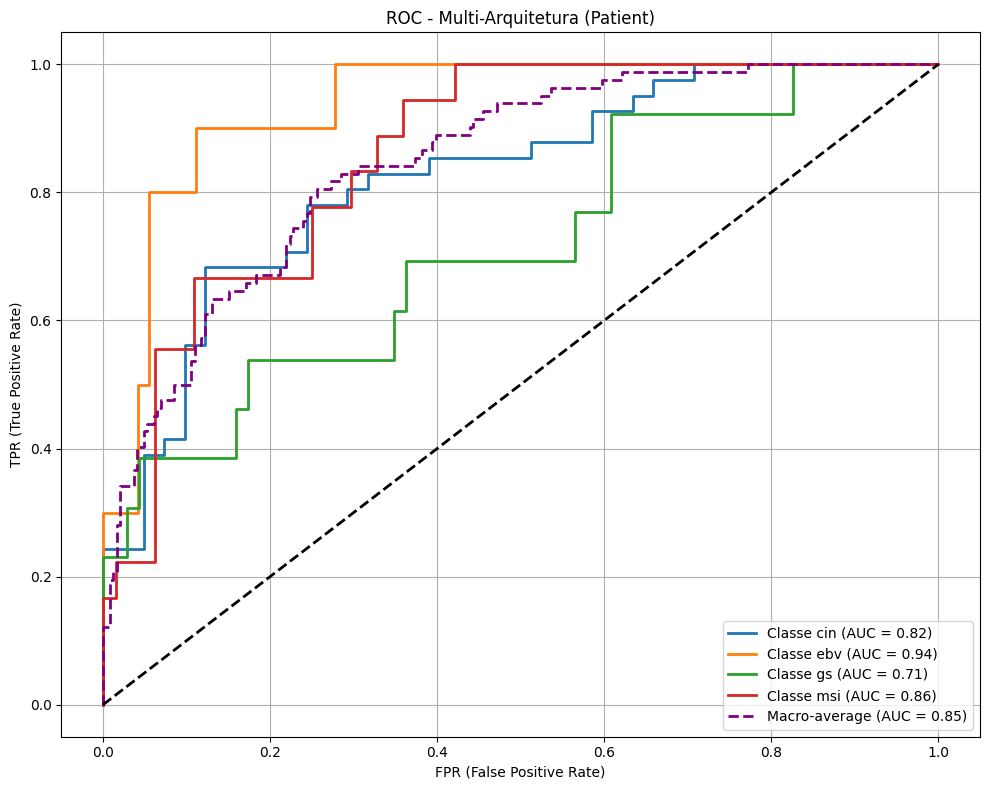

In [13]:
# Curva ROC em nível de PACIENTE
ma.plot_sodt_roc_curve(
    df=agg_patient_df,
    level='PATIENT',
    fig_name=f'ROC - Multi-Arquitetura (Patient)',
    file_name='ma_patient_roc.png',
    save_output_dir=AUC_ROC_MA_DIR
)
